### Clustering with KMeans!

more info on the algorithm: <a href="https://github.com/drzamoramora/AI01-MachineLearning/blob/master/Semana%209%20-%20Aprendizaje%20no%20supervisado/1-K-medias.ipynb">here</a>

In [27]:
# lets use pandas to load the dataset!
import pandas as pd

data = pd.read_csv('cereal_pca.csv')
data.head(10)

,A,B,name
0,0.320354,0.761119,100% Bran
1,-0.039224,0.648311,100% Natural Bran
2,0.821615,-0.250014,All-Bran
3,1.027443,0.091117,All-Bran with Extra Fiber
4,-0.097316,0.179982,Almond Delight
5,-0.797336,-0.222681,Apple Cinnamon Cheerios
6,0.570313,-0.534022,Apple Jacks
7,-0.764793,-0.281771,Basic 4
8,0.035229,0.309659,Bran Chex
9,0.129980,0.417448,Bran Flakes


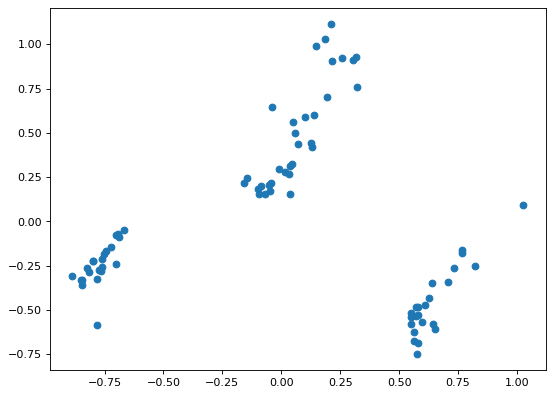

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(data.A, data.B)

### Generate Clusters with KMEANS

In [29]:
# remove name
name =  data.name
data = data[data.columns.difference(['name'])]
data.head()

,A,B
0,0.320354,0.761119
1,-0.039224,0.648311
2,0.821615,-0.250014
3,1.027443,0.091117
4,-0.097316,0.179982


In [30]:
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
labels = kmeans.labels_

data['name'] = name
data['y'] = labels

data.head(10)

,A,B,name,y
0,0.320354,0.761119,100% Bran,0
1,-0.039224,0.648311,100% Natural Bran,0
2,0.821615,-0.250014,All-Bran,1
3,1.027443,0.091117,All-Bran with Extra Fiber,1
4,-0.097316,0.179982,Almond Delight,0
5,-0.797336,-0.222681,Apple Cinnamon Cheerios,2
6,0.570313,-0.534022,Apple Jacks,1
7,-0.764793,-0.281771,Basic 4,2
8,0.035229,0.309659,Bran Chex,0
9,0.129980,0.417448,Bran Flakes,0


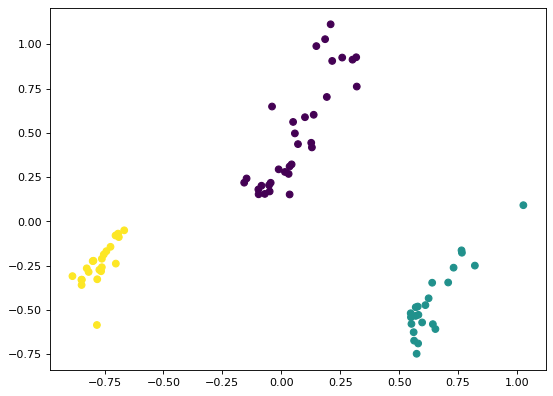

In [31]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(data.A, data.B, c = data.y)

### List products from each group

In [32]:
print("Group 0")
print(data.name[data.y == 0])

Group 0
0                                  100% Bran
1                          100% Natural Bran
4                             Almond Delight
8                                  Bran Chex
9                                Bran Flakes
10                              Cap'n'Crunch
15                                 Corn Chex
20                    Cream of Wheat (Quick)
23                               Double Chex
27    Fruit & Fibre Dates; Walnuts; and Oats
29                            Fruity Pebbles
30                              Golden Crisp
32                         Grape Nuts Flakes
33                                Grape-Nuts
34                        Great Grains Pecan
35                          Honey Graham Ohs
37                                Honey-comb
41                                      Life
43                                     Maypo
44          Muesli Raisins; Dates; & Almonds
45         Muesli Raisins; Peaches; & Pecans
52                     Post Nat. Raisin Bran
54

In [34]:
data.to_csv("cereal_labeled.csv", index = False)